# Machine Learning Models 
### RICE - 3-mers - Cold Model - WORD2VEC

In [1]:
# Import Libs
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

pd.set_option('display.max_column', None)

In [2]:
# Read preprocessed dataset
df = pd.read_excel('rice_word2vec_3mer_dataset.xlsx')
df

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,wc_3mer_11,wc_3mer_12,wc_3mer_13,wc_3mer_14,wc_3mer_15,wc_3mer_16,wc_3mer_17,wc_3mer_18,wc_3mer_19,wc_3mer_20,wc_3mer_21,wc_3mer_22,wc_3mer_23,wc_3mer_24,wc_3mer_25,wc_3mer_26,wc_3mer_27,wc_3mer_28,wc_3mer_29,wc_3mer_30,wc_3mer_31,wc_3mer_32,wc_3mer_33,wc_3mer_34,wc_3mer_35,wc_3mer_36,wc_3mer_37,wc_3mer_38,wc_3mer_39,wc_3mer_40,wc_3mer_41,wc_3mer_42,wc_3mer_43,wc_3mer_44,wc_3mer_45,wc_3mer_46,wc_3mer_47,wc_3mer_48,wc_3mer_49,wc_3mer_50,wc_3mer_51,wc_3mer_52,wc_3mer_53,wc_3mer_54,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,osa-circ1-OS01T0723400,-,multipleTissue,1,30167620,30167771,+,"exon,CDS",-3.738741,8.954664,0.703204,-7.427550,9.996643,-0.181532,18.598464,-34.975266,-1.800704,10.088900,11.424901,-1.636570,-3.321555,-22.263111,-7.457119,-13.712919,-25.194244,13.379119,5.024979,13.891051,-0.778706,-1.582616,-29.698970,-13.487455,-2.635297,0.153941,-6.729408,1.937067,-13.890396,5.699981,10.346069,21.235375,-15.249148,-2.509606,-17.295170,-2.524314,8.413429,10.387917,2.529587,28.291470,-8.340446,-1.465254,-16.143289,-23.164920,7.253290,0.161657,-5.632492,3.622441,24.760824,-14.103022,1.908586,10.980662,-2.810777,-2.429791,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.327910,18.141064
1,osa-circ2-OS03T0223400,-,multipleTissue,3,6461672,6462146,-,"exon,CDS",31.042567,37.664923,95.821671,-13.835744,-44.356329,15.314592,45.651881,-14.309955,-16.547858,-11.756102,23.264810,-15.373362,93.516340,-94.478547,60.210525,-64.286344,-110.666102,36.635698,36.596761,23.283497,-89.084088,-60.709089,-61.246294,9.854025,21.730675,16.742662,-27.386708,22.011955,-29.747639,-49.389946,7.847402,76.312791,-47.593079,-5.291501,-50.093504,23.043607,-35.285442,54.063549,33.339894,88.125166,-6.357325,-22.600085,-25.481221,-91.256396,12.603172,100.277125,26.358520,-8.028812,22.407078,-14.369613,13.383037,104.804504,122.017190,32.695503,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.543510,28.859375
2,osa-circ3-OS11T0210300,-,multipleTissue,11,5715883,5716030,-,"exon,CDS",-31.307338,14.101101,6.012345,-38.559886,47.126226,-4.402491,-2.144210,-110.080545,24.458943,11.733237,-13.059214,-12.444386,-9.278266,21.136430,-24.835724,-6.904371,-60.335124,48.727658,3.094920,86.515437,0.123083,21.572673,-42.097391,-5.580191,-15.554002,3.338543,-25.532132,-16.527929,-27.749277,42.522430,46.525937,10.313219,11.182153,-13.893849,19.971733,-11.351775,17.049707,17.823733,-28.462521,11.535667,28.290712,-0.203219,-48.190255,-19.651423,2.720876,-22.821024,-15.524299,21.680887,31.705901,-46.287435,-9.444007,5.467558,-82.401984,-26.899087,-69.366830,1.113416,-42.689580,-6.150814,23.203639,-7.541412,-11.218056,-40.615067,16.391329,1.324206
3,osa-circ4-OS02T0200900,-,multipleTissue,2,5631023,5631244,-,"exon,CDS",15.773287,55.951050,71.105993,11.420289,-15.831468,-30.626971,37.164693,-23.572454,-3.049738,7.584312,11.867498,-23.127609,64.777123,-42.774641,17.510247,-66.477049,-125.069430,27.732313,57.268453,-1.390962,-13.867632,-55.711631,-51.274765,12.545998,11.312142,43.607043,-48.125263,3.007833,-8.545255,-17.332595,9.219670,33.551777,-40.888797,-42.411864,-9.691005,-10.138627,-27.870589,29.096519,28.853997,100.202715,57.628018,-33.542806,-17.610390,-32.023779,-12.806617,46.923165,16.549295,-27.032846,-13.765128,-52.894110,-11.309565,77.252884,35.469347,25.003562,42.391724,50.721551,-67.643923,-24.403869,41.171276,45.067768,9.704687,9.653121,7.829608,-11.254961
4,osa-circ5-OS05T0494800,-,multipleTissue,5,24302336,24302448,+,"exon,CDS",-44.379635,-33.514299,9.594330,-28.682953,23.765476,24.619851,-26.153289,-72.517970,20.944124,25.842020,-19.716117,17.395272,-63.343466,4.705503,-72.647989,10.874610,13.986652,20.104963,-25.191606,34.926896,21.413258,74.175687,-58.850832,-18.228614,-8.

#### Feature Engineering


In [3]:
# Replace control to 0 and stress to 1 label
df_cold = df.query('stress == "-" or stress == "cold"').replace('-', 0).replace('cold', 1)
df_cold.head()

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,wc_3mer_11,wc_3mer_12,wc_3mer_13,wc_3mer_14,wc_3mer_15,wc_3mer_16,wc_3mer_17,wc_3mer_18,wc_3mer_19,wc_3mer_20,wc_3mer_21,wc_3mer_22,wc_3mer_23,wc_3mer_24,wc_3mer_25,wc_3mer_26,wc_3mer_27,wc_3mer_28,wc_3mer_29,wc_3mer_30,wc_3mer_31,wc_3mer_32,wc_3mer_33,wc_3mer_34,wc_3mer_35,wc_3mer_36,wc_3mer_37,wc_3mer_38,wc_3mer_39,wc_3mer_40,wc_3mer_41,wc_3mer_42,wc_3mer_43,wc_3mer_44,wc_3mer_45,wc_3mer_46,wc_3mer_47,wc_3mer_48,wc_3mer_49,wc_3mer_50,wc_3mer_51,wc_3mer_52,wc_3mer_53,wc_3mer_54,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,osa-circ1-OS01T0723400,0,multipleTissue,1,30167620,30167771,+,"exon,CDS",-3.738741,8.954664,0.703204,-7.427550,9.996643,-0.181532,18.598464,-34.975266,-1.800704,10.088900,11.424901,-1.636570,-3.321555,-22.263111,-7.457119,-13.712919,-25.194244,13.379119,5.024979,13.891051,-0.778706,-1.582616,-29.698970,-13.487455,-2.635297,0.153941,-6.729408,1.937067,-13.890396,5.699981,10.346069,21.235375,-15.249148,-2.509606,-17.295170,-2.524314,8.413429,10.387917,2.529587,28.291470,-8.340446,-1.465254,-16.143289,-23.164920,7.253290,0.161657,-5.632492,3.622441,24.760824,-14.103022,1.908586,10.980662,-2.810777,-2.429791,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.327910,18.141064
1,osa-circ2-OS03T0223400,0,multipleTissue,3,6461672,6462146,0,"exon,CDS",31.042567,37.664923,95.821671,-13.835744,-44.356329,15.314592,45.651881,-14.309955,-16.547858,-11.756102,23.264810,-15.373362,93.516340,-94.478547,60.210525,-64.286344,-110.666102,36.635698,36.596761,23.283497,-89.084088,-60.709089,-61.246294,9.854025,21.730675,16.742662,-27.386708,22.011955,-29.747639,-49.389946,7.847402,76.312791,-47.593079,-5.291501,-50.093504,23.043607,-35.285442,54.063549,33.339894,88.125166,-6.357325,-22.600085,-25.481221,-91.256396,12.603172,100.277125,26.358520,-8.028812,22.407078,-14.369613,13.383037,104.804504,122.017190,32.695503,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.543510,28.859375
2,osa-circ3-OS11T0210300,0,multipleTissue,11,5715883,5716030,0,"exon,CDS",-31.307338,14.101101,6.012345,-38.559886,47.126226,-4.402491,-2.144210,-110.080545,24.458943,11.733237,-13.059214,-12.444386,-9.278266,21.136430,-24.835724,-6.904371,-60.335124,48.727658,3.094920,86.515437,0.123083,21.572673,-42.097391,-5.580191,-15.554002,3.338543,-25.532132,-16.527929,-27.749277,42.522430,46.525937,10.313219,11.182153,-13.893849,19.971733,-11.351775,17.049707,17.823733,-28.462521,11.535667,28.290712,-0.203219,-48.190255,-19.651423,2.720876,-22.821024,-15.524299,21.680887,31.705901,-46.287435,-9.444007,5.467558,-82.401984,-26.899087,-69.366830,1.113416,-42.689580,-6.150814,23.203639,-7.541412,-11.218056,-40.615067,16.391329,1.324206
3,osa-circ4-OS02T0200900,0,multipleTissue,2,5631023,5631244,0,"exon,CDS",15.773287,55.951050,71.105993,11.420289,-15.831468,-30.626971,37.164693,-23.572454,-3.049738,7.584312,11.867498,-23.127609,64.777123,-42.774641,17.510247,-66.477049,-125.069430,27.732313,57.268453,-1.390962,-13.867632,-55.711631,-51.274765,12.545998,11.312142,43.607043,-48.125263,3.007833,-8.545255,-17.332595,9.219670,33.551777,-40.888797,-42.411864,-9.691005,-10.138627,-27.870589,29.096519,28.853997,100.202715,57.628018,-33.542806,-17.610390,-32.023779,-12.806617,46.923165,16.549295,-27.032846,-13.765128,-52.894110,-11.309565,77.252884,35.469347,25.003562,42.391724,50.721551,-67.643923,-24.403869,41.171276,45.067768,9.704687,9.653121,7.829608,-11.254961
4,osa-circ5-OS05T0494800,0,multipleTissue,5,24302336,24302448,+,"exon,CDS",-44.379635,-33.514299,9.594330,-28.682953,23.765476,24.619851,-26.153289,-72.517970,20.944124,25.842020,-19.716117,17.395272,-63.343466,4.705503,-72.647989,10.874610,13.986652,20.104963,-25.191606,34.926896,21.413258,74.175687,-58.850832,-18.228614,-8.

In [4]:
df_cold['start_anno'] = df_cold['start_anno'].replace('exon,CDS', 'exon,')
df_cold['start_anno'].unique()

array(['exon,', 'intron', 'intergenic'], dtype=object)

In [6]:
df_cold = pd.concat([df_cold, pd.get_dummies(df_cold['start_anno'])], axis=1) 

In [7]:
# Removing columns that will not be used
df_cold = df_cold.drop(['circName', 'tissue', 'chr', 'start', 'end', 'strand', 'start_anno'], axis=1)
df_cold.head()

,stress,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,wc_3mer_11,wc_3mer_12,wc_3mer_13,wc_3mer_14,wc_3mer_15,wc_3mer_16,wc_3mer_17,wc_3mer_18,wc_3mer_19,wc_3mer_20,wc_3mer_21,wc_3mer_22,wc_3mer_23,wc_3mer_24,wc_3mer_25,wc_3mer_26,wc_3mer_27,wc_3mer_28,wc_3mer_29,wc_3mer_30,wc_3mer_31,wc_3mer_32,wc_3mer_33,wc_3mer_34,wc_3mer_35,wc_3mer_36,wc_3mer_37,wc_3mer_38,wc_3mer_39,wc_3mer_40,wc_3mer_41,wc_3mer_42,wc_3mer_43,wc_3mer_44,wc_3mer_45,wc_3mer_46,wc_3mer_47,wc_3mer_48,wc_3mer_49,wc_3mer_50,wc_3mer_51,wc_3mer_52,wc_3mer_53,wc_3mer_54,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64,"exon,",intergenic,intron
0,0,-3.738741,8.954664,0.703204,-7.427550,9.996643,-0.181532,18.598464,-34.975266,-1.800704,10.088900,11.424901,-1.636570,-3.321555,-22.263111,-7.457119,-13.712919,-25.194244,13.379119,5.024979,13.891051,-0.778706,-1.582616,-29.698970,-13.487455,-2.635297,0.153941,-6.729408,1.937067,-13.890396,5.699981,10.346069,21.235375,-15.249148,-2.509606,-17.295170,-2.524314,8.413429,10.387917,2.529587,28.291470,-8.340446,-1.465254,-16.143289,-23.164920,7.253290,0.161657,-5.632492,3.622441,24.760824,-14.103022,1.908586,10.980662,-2.810777,-2.429791,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.327910,18.141064,1,0,0
1,0,31.042567,37.664923,95.821671,-13.835744,-44.356329,15.314592,45.651881,-14.309955,-16.547858,-11.756102,23.264810,-15.373362,93.516340,-94.478547,60.210525,-64.286344,-110.666102,36.635698,36.596761,23.283497,-89.084088,-60.709089,-61.246294,9.854025,21.730675,16.742662,-27.386708,22.011955,-29.747639,-49.389946,7.847402,76.312791,-47.593079,-5.291501,-50.093504,23.043607,-35.285442,54.063549,33.339894,88.125166,-6.357325,-22.600085,-25.481221,-91.256396,12.603172,100.277125,26.358520,-8.028812,22.407078,-14.369613,13.383037,104.804504,122.017190,32.695503,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.543510,28.859375,1,0,0
2,0,-31.307338,14.101101,6.012345,-38.559886,47.126226,-4.402491,-2.144210,-110.080545,24.458943,11.733237,-13.059214,-12.444386,-9.278266,21.136430,-24.835724,-6.904371,-60.335124,48.727658,3.094920,86.515437,0.123083,21.572673,-42.097391,-5.580191,-15.554002,3.338543,-25.532132,-16.527929,-27.749277,42.522430,46.525937,10.313219,11.182153,-13.893849,19.971733,-11.351775,17.049707,17.823733,-28.462521,11.535667,28.290712,-0.203219,-48.190255,-19.651423,2.720876,-22.821024,-15.524299,21.680887,31.705901,-46.287435,-9.444007,5.467558,-82.401984,-26.899087,-69.366830,1.113416,-42.689580,-6.150814,23.203639,-7.541412,-11.218056,-40.615067,16.391329,1.324206,1,0,0
3,0,15.773287,55.951050,71.105993,11.420289,-15.831468,-30.626971,37.164693,-23.572454,-3.049738,7.584312,11.867498,-23.127609,64.777123,-42.774641,17.510247,-66.477049,-125.069430,27.732313,57.268453,-1.390962,-13.867632,-55.711631,-51.274765,12.545998,11.312142,43.607043,-48.125263,3.007833,-8.545255,-17.332595,9.219670,33.551777,-40.888797,-42.411864,-9.691005,-10.138627,-27.870589,29.096519,28.853997,100.202715,57.628018,-33.542806,-17.610390,-32.023779,-12.806617,46.923165,16.549295,-27.032846,-13.765128,-52.894110,-11.309565,77.252884,35.469347,25.003562,42.391724,50.721551,-67.643923,-24.403869,41.171276,45.067768,9.704687,9.653121,7.829608,-11.254961,1,0,0
4,0,-44.379635,-33.514299,9.594330,-28.682953,23.765476,24.619851,-26.153289,-72.517970,20.944124,25.842020,-19.716117,17.395272,-63.343466,4.705503,-72.647989,10.874610,13.986652,20.104963,-25.191606,34.926896,21.413258,74.175687,-58.850832,-18.228614,-8.223511,9.955819,3.800737,-4.657548,-24.423108,30.216160,36.670849,-14.726325,11.267796,-46.972525,-6.086202,-13.857812,44.489613,4.180342,1.991478,6.396894,0.788953,4.242912,-21.299661,0.532157,41.153066,-48.585809,-19.024856,12.497647,42.343889,-40.935237,4.791113,-20.217669,-74.524416,-41.915476,-75.243917,-36.308267,7.583992,-27.560256,-24.934

In [8]:
# Define X and y target variables
X = df_cold.drop(['stress'], axis=1)
y = df_cold['stress']

In [9]:
X.head()

,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,wc_3mer_11,wc_3mer_12,wc_3mer_13,wc_3mer_14,wc_3mer_15,wc_3mer_16,wc_3mer_17,wc_3mer_18,wc_3mer_19,wc_3mer_20,wc_3mer_21,wc_3mer_22,wc_3mer_23,wc_3mer_24,wc_3mer_25,wc_3mer_26,wc_3mer_27,wc_3mer_28,wc_3mer_29,wc_3mer_30,wc_3mer_31,wc_3mer_32,wc_3mer_33,wc_3mer_34,wc_3mer_35,wc_3mer_36,wc_3mer_37,wc_3mer_38,wc_3mer_39,wc_3mer_40,wc_3mer_41,wc_3mer_42,wc_3mer_43,wc_3mer_44,wc_3mer_45,wc_3mer_46,wc_3mer_47,wc_3mer_48,wc_3mer_49,wc_3mer_50,wc_3mer_51,wc_3mer_52,wc_3mer_53,wc_3mer_54,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64,"exon,",intergenic,intron
0,-3.738741,8.954664,0.703204,-7.427550,9.996643,-0.181532,18.598464,-34.975266,-1.800704,10.088900,11.424901,-1.636570,-3.321555,-22.263111,-7.457119,-13.712919,-25.194244,13.379119,5.024979,13.891051,-0.778706,-1.582616,-29.698970,-13.487455,-2.635297,0.153941,-6.729408,1.937067,-13.890396,5.699981,10.346069,21.235375,-15.249148,-2.509606,-17.295170,-2.524314,8.413429,10.387917,2.529587,28.291470,-8.340446,-1.465254,-16.143289,-23.164920,7.253290,0.161657,-5.632492,3.622441,24.760824,-14.103022,1.908586,10.980662,-2.810777,-2.429791,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.327910,18.141064,1,0,0
1,31.042567,37.664923,95.821671,-13.835744,-44.356329,15.314592,45.651881,-14.309955,-16.547858,-11.756102,23.264810,-15.373362,93.516340,-94.478547,60.210525,-64.286344,-110.666102,36.635698,36.596761,23.283497,-89.084088,-60.709089,-61.246294,9.854025,21.730675,16.742662,-27.386708,22.011955,-29.747639,-49.389946,7.847402,76.312791,-47.593079,-5.291501,-50.093504,23.043607,-35.285442,54.063549,33.339894,88.125166,-6.357325,-22.600085,-25.481221,-91.256396,12.603172,100.277125,26.358520,-8.028812,22.407078,-14.369613,13.383037,104.804504,122.017190,32.695503,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.543510,28.859375,1,0,0
2,-31.307338,14.101101,6.012345,-38.559886,47.126226,-4.402491,-2.144210,-110.080545,24.458943,11.733237,-13.059214,-12.444386,-9.278266,21.136430,-24.835724,-6.904371,-60.335124,48.727658,3.094920,86.515437,0.123083,21.572673,-42.097391,-5.580191,-15.554002,3.338543,-25.532132,-16.527929,-27.749277,42.522430,46.525937,10.313219,11.182153,-13.893849,19.971733,-11.351775,17.049707,17.823733,-28.462521,11.535667,28.290712,-0.203219,-48.190255,-19.651423,2.720876,-22.821024,-15.524299,21.680887,31.705901,-46.287435,-9.444007,5.467558,-82.401984,-26.899087,-69.366830,1.113416,-42.689580,-6.150814,23.203639,-7.541412,-11.218056,-40.615067,16.391329,1.324206,1,0,0
3,15.773287,55.951050,71.105993,11.420289,-15.831468,-30.626971,37.164693,-23.572454,-3.049738,7.584312,11.867498,-23.127609,64.777123,-42.774641,17.510247,-66.477049,-125.069430,27.732313,57.268453,-1.390962,-13.867632,-55.711631,-51.274765,12.545998,11.312142,43.607043,-48.125263,3.007833,-8.545255,-17.332595,9.219670,33.551777,-40.888797,-42.411864,-9.691005,-10.138627,-27.870589,29.096519,28.853997,100.202715,57.628018,-33.542806,-17.610390,-32.023779,-12.806617,46.923165,16.549295,-27.032846,-13.765128,-52.894110,-11.309565,77.252884,35.469347,25.003562,42.391724,50.721551,-67.643923,-24.403869,41.171276,45.067768,9.704687,9.653121,7.829608,-11.254961,1,0,0
4,-44.379635,-33.514299,9.594330,-28.682953,23.765476,24.619851,-26.153289,-72.517970,20.944124,25.842020,-19.716117,17.395272,-63.343466,4.705503,-72.647989,10.874610,13.986652,20.104963,-25.191606,34.926896,21.413258,74.175687,-58.850832,-18.228614,-8.223511,9.955819,3.800737,-4.657548,-24.423108,30.216160,36.670849,-14.726325,11.267796,-46.972525,-6.086202,-13.857812,44.489613,4.180342,1.991478,6.396894,0.788953,4.242912,-21.299661,0.532157,41.153066,-48.585809,-19.024856,12.497647,42.343889,-40.935237,4.791113,-20.217669,-74.524416,-41.915476,-75.243917,-36.308267,7.583992,-27.560256,-24.934966,-15.739278,9.

In [10]:
y.value_counts()

0    50187
1     5724
Name: stress, dtype: int64

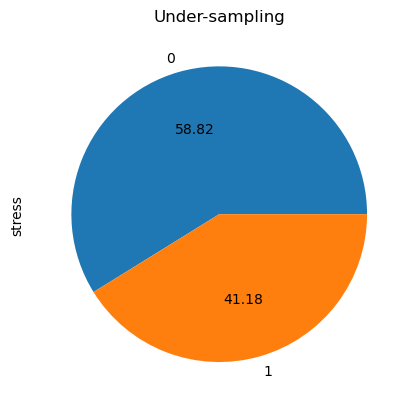

In [11]:
# Balacing data using UnderSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy=0.7) 

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [12]:
y_res.value_counts()

0    8177
1    5724
Name: stress, dtype: int64

In [13]:
# Split data into train and teste
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

## Machine Learning - Cold

In [14]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [01:40<00:00,  3.45s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.74,0.72,0.72,0.74,6.93
ExtraTreesClassifier,0.74,0.72,0.72,0.73,2.18
XGBClassifier,0.73,0.72,0.72,0.73,5.49
LGBMClassifier,0.73,0.72,0.72,0.73,0.73
NuSVC,0.72,0.71,0.71,0.72,25.27
AdaBoostClassifier,0.72,0.71,0.71,0.72,4.17
KNeighborsClassifier,0.69,0.69,0.69,0.69,0.92
BaggingClassifier,0.70,0.68,0.68,0.69,5.63
LabelSpreading,0.67,0.67,0.67,0.67,9.51
